Dane o ofertach pobrane ze strony: https://www.otomoto.pl/?category=motocykle-i-quady
Komenda do pobrania danych - poniżej w komentarzu (aby nie uruchamiać jej).
Dane z dnia 2019-04-19 już są pobrane do pliku ./scrapy_motory/motory.json

In [92]:
%matplotlib inline

In [93]:
# data pobrania danych - posłuży nam potem do przeliczalnia na PLN po kursie średnim sz tego dnia
data_pobrania_danych='2019-02-01'
rok_pobrania_danych=int(data_pobrania_danych[:4])

In [94]:
#%%cmd
#cd scrapy_motory
#scrapy crawl motory -o motory.json

Wczytujemy dane z pliku JSON

In [95]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 60)
import json
import seaborn as sns
import numpy as np

with open('./scrapy_motory/motory.json') as plik_json:
    data = json.load(plik_json)
data[2]

{'Oferta od': 'Osoby prywatnej',
 'Kategoria': 'Motocykle',
 'Marka pojazdu': 'Kymco',
 'Model pojazdu': 'Inny',
 'Rok produkcji': '2017',
 'Przebieg': '5 400 km',
 'Pojemność skokowa': '125 cm3',
 'Moc': '15 KM',
 'Rodzaj napędu': 'Pas napędowy',
 'Typ Silnika': 'Czterosuwowy',
 'Rodzaj paliwa': 'Benzyna',
 'Skrzynia biegów': 'Automatyczna',
 'Typ': 'Skuter',
 'Kolor': 'Szary',
 'Metalik': 'Tak',
 'VAT marża': 'Tak',
 'Kraj pochodzenia': 'Francja',
 'Pierwszy właściciel': 'Tak',
 'Bezwypadkowy': 'Tak',
 'Stan': 'Używane',
 'Lokalizacja': 'Rąbień, gm. Aleksandrów Łódzki, zgierski, Łódzkie',
 'Link': 'https://www.otomoto.pl/oferta/kymco-kymco-125-xtown-2017-r-nowy-model-ID6BPzqv.html',
 'Cena': '11500',
 'Waluta': 'PLN'}

In [96]:
dane = pd.DataFrame.from_dict(data)

#### Wyświetlmy sobie nazwy kolumn i statystyki o danych

In [97]:
dane.columns

Index(['Bezwypadkowy', 'Cena', 'Faktura VAT', 'Kategoria', 'Kolor',
       'Kraj pochodzenia', 'Leasing', 'Liczba pozostałych rat', 'Link',
       'Lokalizacja', 'Marka pojazdu', 'Matowy', 'Metalik', 'Miesięczna rata',
       'Moc', 'Model pojazdu', 'Możliwość finansowania',
       'Numer rejestracyjny pojazdu', 'Oferta od', 'Opłata początkowa',
       'Perłowy', 'Pierwsza rejestracja', 'Pierwszy właściciel',
       'Pojemność skokowa', 'Przebieg', 'Rodzaj napędu', 'Rodzaj paliwa',
       'Rok produkcji', 'Serwisowany w ASO', 'Skrzynia biegów', 'Stan',
       'Tuning', 'Typ', 'Typ Silnika', 'Uszkodzony', 'VAT marża', 'VIN',
       'Waluta', 'Wartość wykupu', 'Zarejestrowany jako zabytek',
       'Zarejestrowany w Polsce'],
      dtype='object')

In [98]:
dane.dtypes

Bezwypadkowy                   object
Cena                           object
Faktura VAT                    object
Kategoria                      object
Kolor                          object
Kraj pochodzenia               object
Leasing                        object
Liczba pozostałych rat         object
Link                           object
Lokalizacja                    object
Marka pojazdu                  object
Matowy                         object
Metalik                        object
Miesięczna rata                object
Moc                            object
Model pojazdu                  object
Możliwość finansowania         object
Numer rejestracyjny pojazdu    object
Oferta od                      object
Opłata początkowa              object
Perłowy                        object
Pierwsza rejestracja           object
Pierwszy właściciel            object
Pojemność skokowa              object
Przebieg                       object
Rodzaj napędu                  object
Rodzaj paliw

In [99]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17574 entries, 0 to 17573
Data columns (total 41 columns):
Bezwypadkowy                   11086 non-null object
Cena                           17574 non-null object
Faktura VAT                    5947 non-null object
Kategoria                      17574 non-null object
Kolor                          17573 non-null object
Kraj pochodzenia               8781 non-null object
Leasing                        1775 non-null object
Liczba pozostałych rat         95 non-null object
Link                           17574 non-null object
Lokalizacja                    17574 non-null object
Marka pojazdu                  17574 non-null object
Matowy                         1450 non-null object
Metalik                        5977 non-null object
Miesięczna rata                95 non-null object
Moc                            11788 non-null object
Model pojazdu                  17485 non-null object
Możliwość finansowania         5389 non-null object
Nu

In [100]:
dane.describe()

,Bezwypadkowy,Cena,Faktura VAT,Kategoria,Kolor,Kraj pochodzenia,Leasing,Liczba pozostałych rat,Link,Lokalizacja,Marka pojazdu,Matowy,Metalik,Miesięczna rata,Moc,Model pojazdu,Możliwość finansowania,Numer rejestracyjny pojazdu,Oferta od,Opłata początkowa,Perłowy,Pierwsza rejestracja,Pierwszy właściciel,Pojemność skokowa,Przebieg,Rodzaj napędu,Rodzaj paliwa,Rok produkcji,Serwisowany w ASO,Skrzynia biegów,Stan,Tuning,Typ,Typ Silnika,Uszkodzony,VAT marża,VIN,Waluta,Wartość wykupu,Zarejestrowany jako zabytek,Zarejestrowany w Polsce
count,11086,17574,5947,17574,17573,8781,1775,95,17574,17574,17574,1450,5977,95,11788,17485,5389,658,17574,93,1804,2859,3445,15852,17573,13851,17574,17574,2811,12950,17574,665,17574,13339,390,3798,1926,17574,94,18,5308
unique,1,2072,1,1,14,25,1,14,17574,2648,124,1,1,88,246,696,1,652,2,86,1,2061,1,539,4640,3,3,79,1,4,2,1,10,3,1,1,1918,2,84,1,1
top,Tak,19900,Tak,Motocykle,Czarny,Polska,Tak,36,https://www.otomoto.pl/oferta/honda-hornet-cb6...,"ul. Wyzwolenia 408 B - 43-265 Mizerów, pszczyń...",Honda,Tak,Tak,1 022 PLN,15 KM,Inny,Tak,GWE 5JF7,Firmy,1 PLN,Tak,1 styczeń 2007,Tak,125 cm3,1 km,Łańcuch,Benzyna,2018,Tak,Manualna,Używane,Tak,Turystyczny,Czterosuwowy,Tak,Tak,JS1VY52AX82102367,PLN,1 PLN,Tak,Tak
freq,11086,177,5947,17574,5044,3061,1775,41,1,333,2935,1450,5977,2,765,2096,5389,2,10649,3,1804,15,3445,2367,4794,7773,17407,2672,2811,9535,13465,665,3679,12528,390,3798,2,17459,3,18,5308


In [101]:
# Lista funkcji - przekształceń na wczytanych danyck
funkcje = []

# Kolumny do usunięcia po wstępnej analizie :
|pole|dlaczego do skasowania|
------------ | -------------|
|**Kategoria**| wszystkie mają tę samą wartość: Motocykle|
| **Link**|link do oferty (pomocniczy), każda oferta ma unikalny link|
| **Numer rejestracyjny pojazdu**|każdy motor ma unikalny numer|
|**VIN**| każdy motor ma unikalny numer|
|**Bezwypadkowy**|60% ma wartość TAK, pozostale=brak danych (nie ma wartości NIE)- czyli w praktyce nie wiadomo czy zataił czy miał wypadek|
|**Pierwsza rejestracja**|W większości brak danych, jeśli jest, to zazwyczaj jest najdalej rok produkcji + 1| 


### Pozostałe kolumny związane z finansowaniem - nie mają znaczenia w naszej analizie:
Faktura VAT,Leasing,Liczba pozostałych rat,Miesięczna rata,Możliwość finansowania,Opłata początkowa,VAT marża,'Wartość wykupu<br>
**Kasujemy te kolumny**

In [102]:
kolumny_do_skasowania=[
    'Lokalizacja','Kategoria','Link','Numer rejestracyjny pojazdu','VIN','Bezwypadkowy','Pierwsza rejestracja',
    'Faktura VAT','Leasing','Liczba pozostałych rat','Miesięczna rata','Możliwość finansowania',
    'Opłata początkowa','VAT marża','Wartość wykupu'
]
wiersze_do_skasowania = []

## Pole 'Kraj pochodzenia' - kasujemy, bo jest 8633 wartosci NaN'

In [103]:
dane['Kraj pochodzenia'].value_counts(dropna=False)
kolumny_do_skasowania.append('Kraj pochodzenia')

## Pole ''Skrzynia biegów' - kasujemy, bo jest 4511 wartosci NaN'

In [104]:
dane['Skrzynia biegów'].value_counts(dropna=False)

Manualna           9535
NaN                4624
Automatyczna       2402
Bezstopniowa        777
Półautomatyczna     236
Name: Skrzynia biegów, dtype: int64

In [105]:
kolumny_do_skasowania.append('Skrzynia biegów')

## Pole 'Zarejestrowany w Polsce' - kasujemy, bo 75% wartosci NaN'

In [106]:
dane['Zarejestrowany w Polsce'].value_counts(dropna=False)

NaN    12266
Tak     5308
Name: Zarejestrowany w Polsce, dtype: int64

In [107]:
kolumny_do_skasowania.append('Zarejestrowany w Polsce')

## Pole 'Rodzaj paliwa' - kasujemy, bo praktycznie 99% to "Benzyna"

In [108]:
dane['Rodzaj paliwa'].value_counts(dropna=False)

Benzyna        17407
Elektryczny      146
Diesel            21
Name: Rodzaj paliwa, dtype: int64

In [109]:
kolumny_do_skasowania.append('Rodzaj paliwa')

# Pojazdy uszkodzone i zabytkowe - kasujemy
#### Kasujemy pojazdy uszkodzone (390 pozycji), a potem kolumnę "Uszkodzony"
ceny pojazdów uszkodzonych mogą się znacznie różnić zależnie od rodzaju uszkodzenia (np. ten sam model z lekkim otarciem lakieru vs. rozwalonym silnikiem - ceny będą diametralnie różnie), więc są niereprezentatywne i będą źle wpływać na model
#### Kasujemy pojazdy zabytkowe (18 pozycji) oraz kolumnę"Zarejestrowany jako zabytek"
wycena pojazdów zabytkowych może być przez rzeczoznawcę wykonana, nie przez komputer <br>
jest ich bardzo mało w zbiorze danych, zależnie od stanu zabytku jego cena może być bardzo różna

In [110]:
fun_uszkodzone = lambda x: x['Uszkodzony'] =="Tak" 
fun_zabytkowe = lambda x: x['Zarejestrowany jako zabytek'] =="Tak" 

wiersze_do_skasowania.extend([fun_uszkodzone,fun_zabytkowe])
kolumny_do_skasowania.extend(['Uszkodzony','Zarejestrowany jako zabytek'])
# dane.loc[fun_zabytkowe].head()

### Pole 'Cena' - sprawdzenie czy są NaN (nie ma) oraz konwersja na liczbę

In [111]:
# Sprawdzamy pole Cena - czy są jakieś braki
print(dane.Cena.isnull().sum())
print(dane.Cena.dtype)

0
object


In [112]:
# Separatorem dziesiętnym w polu Cena jest przecinek - ustawimy locale aby odpowiednio to obsłużył
import locale

def zamiana_ceny_na_liczbe(zbior):
    print('Zamieniamy pole Cena na liczby')
    locale.setlocale(locale.LC_ALL,'pl_PL')
    zbior['Cena'] = pd.to_numeric(zbior['Cena'], errors='coerce')
    # Kasujemy wiersze które nie mają ceny
    dane.drop(zbior[zbior['Cena'].isnull()].index,axis=0,inplace=True)

zamiana_ceny_na_liczbe(dane)

Zamieniamy pole Cena na liczby


### Pole 'Rok produkcji' zamienimy na 'Wiek pojazdu' (w latach). Pojazdy starsze od 30 lat traktujemy jako zabytek i kasujemy ze zbioru (425 pozycji) - ponieważ po 30 roku cena rośnie zamiast spadać (patrz wykres)

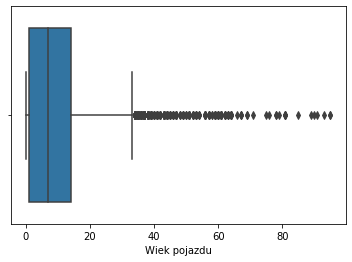

In [113]:

wiek_pojazdu = (rok_pobrania_danych - dane['Rok produkcji'].astype(int)).rename('Wiek pojazdu')

# zamien_rok_produkcji_na_wiek(dane)
# funkcje.append(zamien_rok_produkcji_na_wiek)
sns.boxplot(x=wiek_pojazdu)

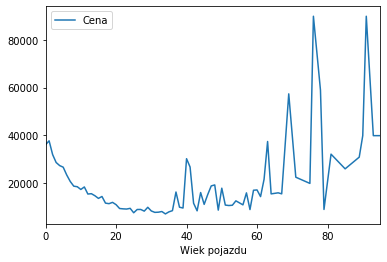

In [114]:
pd.concat([wiek_pojazdu,dane['Cena']], axis=1).groupby('Wiek pojazdu').mean().plot()

In [115]:
print(len(wiek_pojazdu[wiek_pojazdu > 30]))

437


In [116]:
def kolumna_rok_produkcji(zbior):
    zbior['Wiek pojazdu'] = (rok_pobrania_danych - dane['Rok produkcji'].astype(int))
    zbior.drop(zbior[zbior['Wiek pojazdu'] > 30].index, inplace=True)
    zbior.drop('Rok produkcji', axis=1, inplace=True)

kolumna_rok_produkcji(dane)
funkcje.append(kolumna_rok_produkcji)

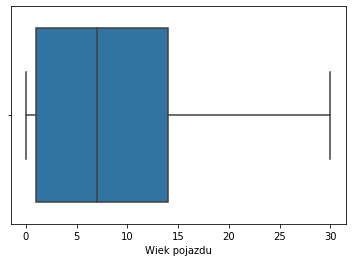

In [117]:
sns.boxplot(x=dane['Wiek pojazdu'])

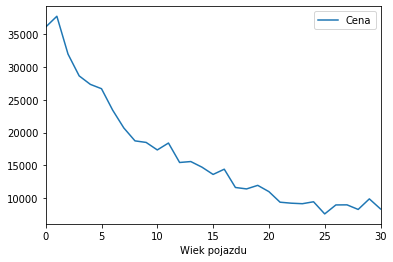

In [118]:
dane[['Wiek pojazdu','Cena']].groupby('Wiek pojazdu').mean().plot()

# Analizujemy pole Waluta - są pojazdy w innych walutach, więc przeliczamy je na PLN po kursie średnim NBP z daty ściągnięcia danych ze strony 
Uwaga - jeśli będzie błąd pobrania danych z NB to proszę zmienić parametr `data_pobrania_danych` <br>
na +/1-2 dni bo być może w tej dacie nie ma tabeli kursów NBP

In [119]:
dane.groupby('Waluta').size()

Waluta
EUR      114
PLN    17011
dtype: int64

In [120]:
import requests
import json

def pobierz_kurs_sredni_nbp(data,waluta):
    """Pobiera kurs średni NBP dla podanej daty (format daty: yyyy-mm-dd) oraz kodu waluty (np. EUR)"""
    NBP_URL = f'http://api.nbp.pl/api/exchangerates/rates/A/{waluta}/{data}/'
    response = requests.get(NBP_URL)
    if(response.ok):
        api_data = json.loads(response.content)
        return api_data['rates'][0]['mid']
    else:
        response.raise_for_status()

# test pobrania kursu
pobierz_kurs_sredni_nbp(data_pobrania_danych,'EUR')

4.2706

In [121]:
# Cena - zamiana przecinka dziesiętnego na kropkę, a potem na INT
# dane['Cena'] = dane['Cena'].str.replace(',','.')
# dane['Cena'] = dane['Cena'].astype(float).astype(int)

In [122]:
dane.sample()

,Bezwypadkowy,Cena,Faktura VAT,Kategoria,Kolor,Kraj pochodzenia,Leasing,Liczba pozostałych rat,Link,Lokalizacja,Marka pojazdu,Matowy,Metalik,Miesięczna rata,Moc,Model pojazdu,Możliwość finansowania,Numer rejestracyjny pojazdu,Oferta od,Opłata początkowa,Perłowy,Pierwsza rejestracja,Pierwszy właściciel,Pojemność skokowa,Przebieg,Rodzaj napędu,Rodzaj paliwa,Serwisowany w ASO,Skrzynia biegów,Stan,Tuning,Typ,Typ Silnika,Uszkodzony,VAT marża,VIN,Waluta,Wartość wykupu,Zarejestrowany jako zabytek,Zarejestrowany w Polsce,Wiek pojazdu
14591,Tak,5200.0,NaN,Motocykle,Bordowy,Belgia,NaN,NaN,https://www.otomoto.pl/oferta/kawasaki-1000-gt...,"Malina 64 - 99-300 Kutno, kutnowski, Łódzkie (...",Kawasaki,NaN,Tak,NaN,NaN,1000 GTR,Tak,NaN,Firmy,NaN,NaN,NaN,NaN,1 000 cm3,91 000 km,Wał kardana,Benzyna,NaN,Manualna,Używane,Tak,Turystyczny,NaN,NaN,Tak,NaN,PLN,NaN,NaN,NaN,20


#### Sprawdzamy jakie mamy waluty w zbiorze danych

In [123]:
dane['Waluta'].value_counts(dropna=False)

PLN    17011
EUR      114
Name: Waluta, dtype: int64

In [124]:
# dla każdej waluty innej niż PLN przeliczamy na PLN
def przelicz_ceny_po_kursie_srednim_nbp(zbior):
    print('Przeliczamy ceny inne niż PLN po kursie średnim NBP')
    for waluta in zbior['Waluta'].unique():
        if waluta=='PLN':
            continue
        kurs = pobierz_kurs_sredni_nbp(data_pobrania_danych,waluta)
        print(waluta,kurs)
        zbior.loc[ zbior['Waluta']==waluta ,'Cena'] *= kurs
        zbior.loc[ zbior['Waluta']==waluta ,'Waluta'] = 'PLN'

przelicz_ceny_po_kursie_srednim_nbp(dane)

funkcje.append(przelicz_ceny_po_kursie_srednim_nbp)

Przeliczamy ceny inne niż PLN po kursie średnim NBP
EUR 4.2706


#### Sprawdzamy po przeliczeniu ceny po kursach walut jakie zostały nam waluty, i pole Waluta kasujemy - bo są tylko PLN

In [125]:
print(dane.Waluta.unique())

kolumny_do_skasowania.append('Waluta')

['PLN']


### Kolumny: 'Matowy','Metalik','Perłowy','Pierwszy właściciel','Serwisowany w ASO','Tuning'

In [126]:
kolumny=['Matowy','Metalik','Perłowy','Pierwszy właściciel','Serwisowany w ASO','Tuning']
for kolumna in kolumny:
    print(kolumna, dane[kolumna].unique())

Matowy [nan 'Tak']
Metalik ['Tak' nan]
Perłowy [nan 'Tak']
Pierwszy właściciel [nan 'Tak']
Serwisowany w ASO [nan 'Tak']
Tuning [nan 'Tak']


#### mają tyko wartość TAK lub puste - na razie nic nie robimy, na końcu będą wsadem do get_dummies (dla danych kategorycznych)

## Czyścimy pole "Pojemność skokowa" - kasujemy spacje i przyrostek "cm3"

In [127]:
dane['Pojemność skokowa'].head()

0      680 cm3
1    1 255 cm3
2      125 cm3
3    1 202 cm3
4      125 cm3
Name: Pojemność skokowa, dtype: object

In [128]:
def pojemnosc_skokowa(zbior):
    zbior['Pojemność skokowa'] = zbior['Pojemność skokowa'].str.replace('cm3','')
    zbior['Pojemność skokowa'] = zbior['Pojemność skokowa'].str.replace(' ','')
    zbior['Pojemność skokowa'].astype(float)

    zbior['Pojemność skokowa'].isna().sum()
    
pojemnosc_skokowa(dane)
funkcje.append(pojemnosc_skokowa)

#### Sprawdzimy sobie wartości odstające w polu 'Pojemność skokowa'
powinny się mieścić gdzieś do powiedzmy do max. 3000cm3 (silnik większy to już prawdiwy smok)

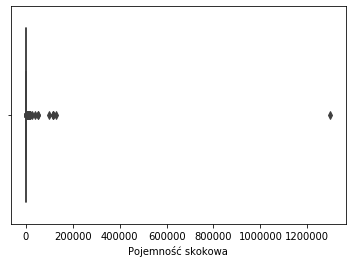

In [129]:
dane['Pojemność skokowa'] = dane['Pojemność skokowa'].astype(float)

pojemnosc = dane['Pojemność skokowa']
pojemnosc=pojemnosc.ffill().bfill()

sns.boxplot(x=pojemnosc)

#### zerujemy pozycje o nienormalnej pojemności skokowej (powyżej 3 litrów - takich silnikw w motorach nie ma)
#### pozostałe puste ustawiamy na średnią

In [130]:
def czysc_pojemnosc_skokowa(zbior):
    zbior.loc[zbior['Pojemność skokowa'] > 3000, 'Pojemność skokowa'] = np.nan
    zbior[zbior['Pojemność skokowa'] > 3000]['Pojemność skokowa'].count()
    zbior.loc[zbior['Pojemność skokowa'].isnull(),'Pojemność skokowa'] = np.trunc(zbior['Pojemność skokowa'].mean())
    
czysc_pojemnosc_skokowa(dane)
funkcje.append(czysc_pojemnosc_skokowa)

#### Po tej operacji pojemności skokowe wyglądają w miarę realistycznie

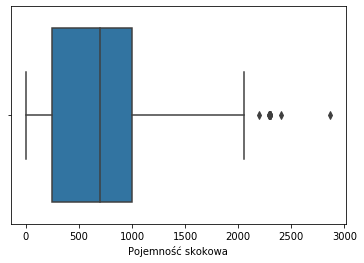

In [131]:
sns.boxplot(x=dane['Pojemność skokowa'])

## Czyścimy pole "Przebieg" - kasujemy spacje i przyrostek "km"

In [132]:
def czysc_przebieg(zbior):
    zbior['Przebieg'] = zbior['Przebieg'].str.replace('km','')
    zbior['Przebieg'] = zbior['Przebieg'].str.replace(' ','')
    zbior['Przebieg'] = zbior['Przebieg'].astype(float)

czysc_przebieg(dane)
funkcje.append(czysc_przebieg)

#### Jeden rekord nie ma podanego przebiegu - skasujemy ten rekord

In [135]:
dane['Przebieg'].isna().sum()
def kasuj_wiersze_bez_przebiegu(zbior):
    zbior.drop(zbior[zbior['Przebieg'].isnull()].index,axis=0,inplace=True)

fun_pusty_przebieg = lambda x: x['Przebieg'].isnull()
wiersze_do_skasowania.append(fun_pusty_przebieg)
dane.loc[fun_pusty_przebieg]

,Bezwypadkowy,Cena,Faktura VAT,Kategoria,Kolor,Kraj pochodzenia,Leasing,Liczba pozostałych rat,Link,Lokalizacja,Marka pojazdu,Matowy,Metalik,Miesięczna rata,Moc,Model pojazdu,Możliwość finansowania,Numer rejestracyjny pojazdu,Oferta od,Opłata początkowa,Perłowy,Pierwsza rejestracja,Pierwszy właściciel,Pojemność skokowa,Przebieg,Rodzaj napędu,Rodzaj paliwa,Serwisowany w ASO,Skrzynia biegów,Stan,Tuning,Typ,Typ Silnika,Uszkodzony,VAT marża,VIN,Waluta,Wartość wykupu,Zarejestrowany jako zabytek,Zarejestrowany w Polsce,Wiek pojazdu
5716,Tak,9900.0,Tak,Motocykle,NaN,NaN,NaN,NaN,https://www.otomoto.pl/oferta/honda-cbr-600-f4...,"Szosa Toruńska 49 - 86-300 Grudziądz, Kujawsko...",Honda,NaN,NaN,NaN,NaN,CBR,Tak,NaN,Firmy,NaN,NaN,NaN,NaN,600.0,NaN,Łańcuch,Benzyna,NaN,NaN,Używane,NaN,Sportowy,NaN,NaN,NaN,NaN,PLN,NaN,NaN,NaN,20


### Analizujemy pole 'Moc' - czyścimy KM, zamieniamy na liczby

In [136]:
dane['Moc'].head()

0    37 KM
1    98 KM
2    15 KM
3      NaN
4    14 KM
Name: Moc, dtype: object

In [137]:
def czyść_pole_moc(zbior):
    zbior['Moc'] = zbior['Moc'].str.replace('KM','')
    zbior['Moc'] = zbior['Moc'].str.replace(' ','')
    zbior['Moc']=zbior['Moc'].astype(float)

czyść_pole_moc(dane)
funkcje.append(czyść_pole_moc)

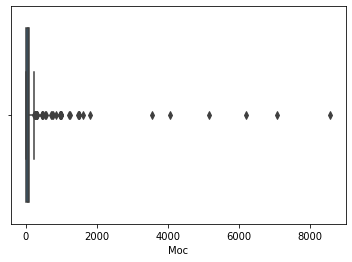

In [138]:
sns.boxplot(x=dane['Moc'])

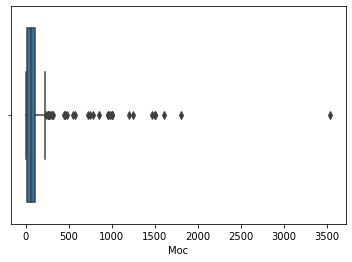

In [139]:
# moce powyżej 1000~2000KM są dla motorów nieprawdopodobne
# sprawdźmy jeszcze zakres < 4000
sns.boxplot(x=dane.loc[dane['Moc']<4000,'Moc'])

### Decyzja - należy wyzerować moce > 2000 KM i przypisać im średnią ze wszystkich mocy

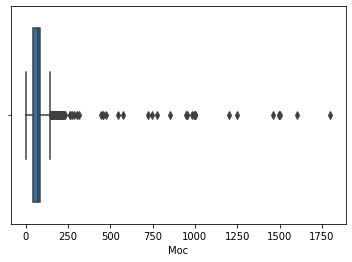

In [141]:
def kasuj_moce_wieksze_od_2000(zbior):
    zbior.loc[zbior['Moc'] > 2000, 'Moc'] = np.nan
    zbior.loc[zbior['Moc'].isnull(),'Moc'] = np.trunc(dane['Moc'].mean())
    
kasuj_moce_wieksze_od_2000(dane)
funkcje.append(kasuj_moce_wieksze_od_2000)

sns.boxplot(x=dane['Moc'])

# Pole 'Kolor'

Czarny        4916
Inny kolor    2382
Niebieski     1872
Czerwony      1824
Biały         1823
Srebrny       1117
Szary         1049
Zielony        735
Bordowy        579
Żółty          355
Brązowy        185
Złoty          140
Fioletowy       76
Beżowy          71
nan              1
Name: Kolor, dtype: int64


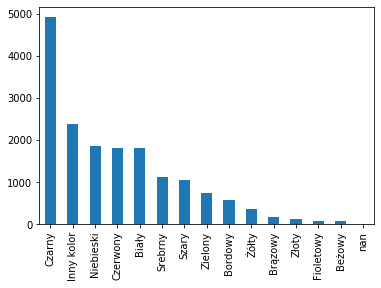

In [142]:
dane.Kolor = dane.Kolor.astype(str)
dane.Kolor.value_counts().plot('bar')
print(dane.Kolor.value_counts())

#### Zróbmy słownik dopuszczalnych kolorów dla których mamy > 100 ofert. 
#### Pozostałe kolory oraz NAN zamienimy na "Inny"

In [144]:
def zamien_kolory(zbior):
    liczebnosci_kolorow = zbior.Kolor.value_counts()
    kolory_od_100_ofert = liczebnosci_kolorow[liczebnosci_kolorow>100].index
    zbior.loc[~dane['Kolor'].isin(kolory_od_100_ofert),'Kolor'] = 'Inny'

In [146]:
zamien_kolory(dane)
funkcje.append(zamien_kolory)

Czarny        4916
Inny kolor    2382
Niebieski     1872
Czerwony      1824
Biały         1823
Srebrny       1117
Szary         1049
Zielony        735
Bordowy        579
Żółty          355
Brązowy        185
Inny           148
Złoty          140
Name: Kolor, dtype: int64


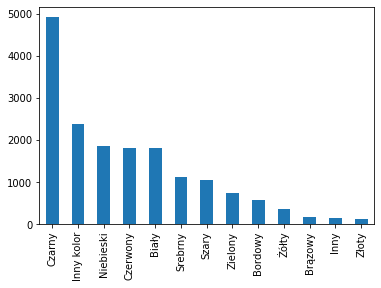

In [148]:
# Sprawdzenie po transformacji
dane.Kolor.value_counts().plot('bar')
print(dane.Kolor.value_counts())

## Pole 'Stan' - ma tylko 2 kategorie, brak NaN - teraz nic nie robimy, pole będzie wsadem do get_dummies

In [149]:
dane['Stan'].value_counts(dropna=False)

Używane    13024
Nowe        4101
Name: Stan, dtype: int64

## Pole 'Oferta od' - ma 2 kategorie, brak NaN - teraz nic nie robimy, pole będzie wsadem do get_dummies

In [151]:
dane['Oferta od'].value_counts(dropna=False)

Firmy              10480
Osoby prywatnej     6645
Name: Oferta od, dtype: int64

## Pole: Typ silnika , występuja NaN - teraz nic nie robimy, pole będzie wsadem do get_dummies który zamieni Nan na Inne

In [153]:
dane['Typ Silnika'].value_counts(dropna=False)

Czterosuwowy    12316
NaN              4063
Dwusuwowy         624
Elektryczny       122
Name: Typ Silnika, dtype: int64

## Pole: Rodzaj napędu , występuja NaN - ale teraz nic nie robimy, pole będzie wsadem do get_dummies który zamieni Nan na Inne

In [154]:
dane['Rodzaj napędu'].value_counts(dropna=False)

Łańcuch         7632
NaN             3557
Pas napędowy    3293
Wał kardana     2643
Name: Rodzaj napędu, dtype: int64

## Pole: Typ, wygląda OK, brak NaN - nie robimy, pole będzie wsadem do get_dummies

In [162]:
dane['Typ'].value_counts(dropna=False)

Turystyczny    3550
Chopper        2329
Skuter         2320
Naked          2132
Sportowy       2071
Quad           1615
Cruiser        1128
Enduro         1094
Krosowy         618
Motorower       268
Name: Typ, dtype: int64

In [165]:
dane.head()

,Bezwypadkowy,Cena,Faktura VAT,Kategoria,Kolor,Kraj pochodzenia,Leasing,Liczba pozostałych rat,Link,Lokalizacja,Marka pojazdu,Matowy,Metalik,Miesięczna rata,Moc,Model pojazdu,Możliwość finansowania,Numer rejestracyjny pojazdu,Oferta od,Opłata początkowa,Perłowy,Pierwsza rejestracja,Pierwszy właściciel,Pojemność skokowa,Przebieg,Rodzaj napędu,Rodzaj paliwa,Serwisowany w ASO,Skrzynia biegów,Stan,Tuning,Typ,Typ Silnika,Uszkodzony,VAT marża,VIN,Waluta,Wartość wykupu,Zarejestrowany jako zabytek,Zarejestrowany w Polsce,Wiek pojazdu
0,NaN,6800.0,NaN,Motocykle,Niebieski,Niemcy,NaN,NaN,https://www.otomoto.pl/oferta/suzuki-xf-suzuki...,"CISOWA 17 - 83-250 Skarszewy, starogardzki, Po...",Suzuki,NaN,Tak,NaN,37.0,XF,NaN,NaN,Firmy,NaN,NaN,NaN,NaN,680.0,60000.0,Łańcuch,Benzyna,NaN,Manualna,Używane,NaN,Enduro,Czterosuwowy,NaN,Tak,NaN,PLN,NaN,NaN,NaN,19
1,Tak,19500.0,NaN,Motocykle,Niebieski,Niemcy,NaN,NaN,https://www.otomoto.pl/oferta/suzuki-gsx-1250-...,"Podańsko, goleniowski, Zachodniopomorskie",Suzuki,NaN,Tak,NaN,98.0,GSX,NaN,NaN,Osoby prywatnej,NaN,NaN,4 sierpień 2010,NaN,1255.0,30900.0,Łańcuch,Benzyna,Tak,Manualna,Używane,NaN,Turystyczny,Czterosuwowy,NaN,NaN,NaN,PLN,NaN,NaN,NaN,9
2,Tak,11500.0,NaN,Motocykle,Szary,Francja,NaN,NaN,https://www.otomoto.pl/oferta/kymco-kymco-125-...,"Rąbień, gm. Aleksandrów Łódzki, zgierski, Łódzkie",Kymco,NaN,Tak,NaN,15.0,Inny,NaN,NaN,Osoby prywatnej,NaN,NaN,NaN,Tak,125.0,5400.0,Pas napędowy,Benzyna,NaN,Automatyczna,Używane,NaN,Skuter,Czterosuwowy,NaN,Tak,NaN,PLN,NaN,NaN,NaN,2
3,Tak,49000.0,NaN,Motocykle,Inny kolor,NaN,NaN,NaN,https://www.otomoto.pl/oferta/harley-davidson-...,"Górczewska 30 - 01-147 Warszawa, Mazowieckie (...",Harley-Davidson,NaN,Tak,NaN,70.0,Sportster,Tak,NaN,Firmy,NaN,NaN,NaN,NaN,1202.0,1.0,Pas napędowy,Benzyna,NaN,NaN,Nowe,NaN,Cruiser,Czterosuwowy,NaN,NaN,NaN,PLN,NaN,NaN,NaN,0
4,Tak,6900.0,NaN,Motocykle,Czarny,Niemcy,NaN,NaN,https://www.otomoto.pl/oferta/honda-cbr-honda-...,"Szamotuły,Gaj Mały 114B - 64-520 Szamotuły, sz...",Honda,NaN,NaN,NaN,14.0,CBR,NaN,NaN,Firmy,NaN,NaN,NaN,NaN,125.0,26000.0,Łańcuch,Benzyna,NaN,Manualna,Używane,NaN,Sportowy,NaN,NaN,NaN,NaN,PLN,NaN,NaN,Tak,12


### Pole 'Marka pojazdu'

In [174]:
dane['Marka pojazdu'].describe()

count      17125
unique       114
top       Yamaha
freq        2863
Name: Marka pojazdu, dtype: object

In [179]:
dane.loc[dane['Marka pojazdu'].isnull(),'Marka pojazdu'].count()

0

In [160]:
dane['Marka pojazdu'].value_counts(dropna=False)

Yamaha               2863
Honda                2810
Suzuki               1754
BMW                  1413
Kawasaki             1180
Harley-Davidson      1093
KTM                   552
Can-Am                461
Inny                  407
Ducati                347
Kymco                 319
Romet                 305
Aprilia               298
Piaggio               283
Triumph               279
Polaris               267
Peugeot               182
Junak                 180
Vespa                 151
CF Moto               135
Barton                132
Zipp                  130
Indian                114
Husqvarna             104
Keeway                 93
Benyco                 89
Moto Guzzi             88
SYM                    76
Benelli                72
Bashan                 70
Linhai                 60
MV AGUSTA              58
Hyosung                58
Bajaj                  52
Daelim                 42
Beta                   41
Malaguti               33
TGB                    33
Gilera      

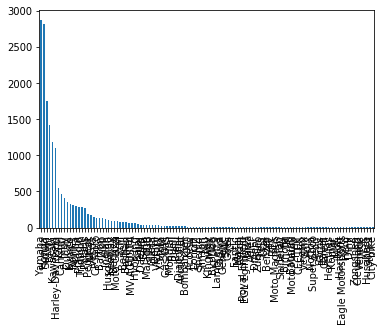

In [180]:
dane['Marka pojazdu'].value_counts().plot('bar')

In [194]:
dane['Marka pojazdu'].value_counts().describe(percentiles=[x/10 for x in range(1,11)])

count     114.000000
mean      150.219298
std       448.478840
min         1.000000
10%         1.000000
20%         2.000000
30%         2.000000
40%         4.000000
50%         8.000000
60%        19.800000
70%        43.000000
80%       108.000000
90%       302.900000
100%     2863.000000
max      2863.000000
Name: Marka pojazdu, dtype: float64

In [190]:
[x/10 for x in range(1,11)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

Marka pojazdu
Model pojazdu


Rodzaj napędu
Typ
Typ Silnika


Pojemność skokowa (skalowanie)
Przebieg (skalowanie)
Moc (skalowanie)

### Pole 'Model pojazdu'


In [166]:
dane['Model pojazdu'].value_counts(dropna=False)

Inny                                   2015
CBR                                     477
R                                       393
GS                                      312
MT                                      277
Shadow                                  259
CB                                      250
Z                                       234
Burgman                                 218
K                                       213
YZF                                     207
CBF                                     186
FZ                                      183
DL                                      183
F                                       177
Sportster                               172
GSX-R                                   170
EXC                                     165
CRF                                     164
Drag Star                               161
Virago                                  159
Outlander                               149
Softail                         

In [195]:
dane['Model pojazdu'].value_counts().describe(percentiles=[x/10 for x in range(1,11)])

count     662.000000
mean       25.734139
std        90.570500
min         1.000000
10%         1.000000
20%         1.000000
30%         2.000000
40%         3.000000
50%         5.000000
60%         9.000000
70%        15.000000
80%        27.000000
90%        62.000000
100%     2015.000000
max      2015.000000
Name: Model pojazdu, dtype: float64

In [196]:
dane.head()

,Bezwypadkowy,Cena,Faktura VAT,Kategoria,Kolor,Kraj pochodzenia,Leasing,Liczba pozostałych rat,Link,Lokalizacja,Marka pojazdu,Matowy,Metalik,Miesięczna rata,Moc,Model pojazdu,Możliwość finansowania,Numer rejestracyjny pojazdu,Oferta od,Opłata początkowa,Perłowy,Pierwsza rejestracja,Pierwszy właściciel,Pojemność skokowa,Przebieg,Rodzaj napędu,Rodzaj paliwa,Serwisowany w ASO,Skrzynia biegów,Stan,Tuning,Typ,Typ Silnika,Uszkodzony,VAT marża,VIN,Waluta,Wartość wykupu,Zarejestrowany jako zabytek,Zarejestrowany w Polsce,Wiek pojazdu
0,NaN,6800.0,NaN,Motocykle,Niebieski,Niemcy,NaN,NaN,https://www.otomoto.pl/oferta/suzuki-xf-suzuki...,"CISOWA 17 - 83-250 Skarszewy, starogardzki, Po...",Suzuki,NaN,Tak,NaN,37.0,XF,NaN,NaN,Firmy,NaN,NaN,NaN,NaN,680.0,60000.0,Łańcuch,Benzyna,NaN,Manualna,Używane,NaN,Enduro,Czterosuwowy,NaN,Tak,NaN,PLN,NaN,NaN,NaN,19
1,Tak,19500.0,NaN,Motocykle,Niebieski,Niemcy,NaN,NaN,https://www.otomoto.pl/oferta/suzuki-gsx-1250-...,"Podańsko, goleniowski, Zachodniopomorskie",Suzuki,NaN,Tak,NaN,98.0,GSX,NaN,NaN,Osoby prywatnej,NaN,NaN,4 sierpień 2010,NaN,1255.0,30900.0,Łańcuch,Benzyna,Tak,Manualna,Używane,NaN,Turystyczny,Czterosuwowy,NaN,NaN,NaN,PLN,NaN,NaN,NaN,9
2,Tak,11500.0,NaN,Motocykle,Szary,Francja,NaN,NaN,https://www.otomoto.pl/oferta/kymco-kymco-125-...,"Rąbień, gm. Aleksandrów Łódzki, zgierski, Łódzkie",Kymco,NaN,Tak,NaN,15.0,Inny,NaN,NaN,Osoby prywatnej,NaN,NaN,NaN,Tak,125.0,5400.0,Pas napędowy,Benzyna,NaN,Automatyczna,Używane,NaN,Skuter,Czterosuwowy,NaN,Tak,NaN,PLN,NaN,NaN,NaN,2
3,Tak,49000.0,NaN,Motocykle,Inny kolor,NaN,NaN,NaN,https://www.otomoto.pl/oferta/harley-davidson-...,"Górczewska 30 - 01-147 Warszawa, Mazowieckie (...",Harley-Davidson,NaN,Tak,NaN,70.0,Sportster,Tak,NaN,Firmy,NaN,NaN,NaN,NaN,1202.0,1.0,Pas napędowy,Benzyna,NaN,NaN,Nowe,NaN,Cruiser,Czterosuwowy,NaN,NaN,NaN,PLN,NaN,NaN,NaN,0
4,Tak,6900.0,NaN,Motocykle,Czarny,Niemcy,NaN,NaN,https://www.otomoto.pl/oferta/honda-cbr-honda-...,"Szamotuły,Gaj Mały 114B - 64-520 Szamotuły, sz...",Honda,NaN,NaN,NaN,14.0,CBR,NaN,NaN,Firmy,NaN,NaN,NaN,NaN,125.0,26000.0,Łańcuch,Benzyna,NaN,Manualna,Używane,NaN,Sportowy,NaN,NaN,NaN,NaN,PLN,NaN,NaN,Tak,12


In [210]:
df = dane[['Marka pojazdu','Model pojazdu','Cena','Przebieg','Moc']]
df.head()

,Marka pojazdu,Model pojazdu,Cena,Przebieg,Moc
0,Suzuki,XF,6800.0,60000.0,37.0
1,Suzuki,GSX,19500.0,30900.0,98.0
2,Kymco,Inny,11500.0,5400.0,15.0
3,Harley-Davidson,Sportster,49000.0,1.0,70.0
4,Honda,CBR,6900.0,26000.0,14.0


In [212]:
g = df.groupby('Marka pojazdu')

In [243]:
g['Model pojazdu'].nunique().sum()

813

In [247]:
df['Marka pojazdu'].unique().shape

(114,)

In [248]:
df['Model pojazdu'].unique().shape

(663,)